# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import Markdown, display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# utility method to print code results in markdown format
def printmd(string):
    display(Markdown(string))

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

#### Chosen samples of wholesale customers dataset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,29729,4786,7326,6130,361,1083
1,180,3485,20292,959,5618,666
2,3191,1993,1799,1730,234,710


#### Percentile ranks

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
33,92.0,59.3,64.1,86.6,33.0,55.2
193,2.7,48.0,91.8,35.5,83.4,37.0
250,25.7,32.7,18.4,53.4,22.3,39.9


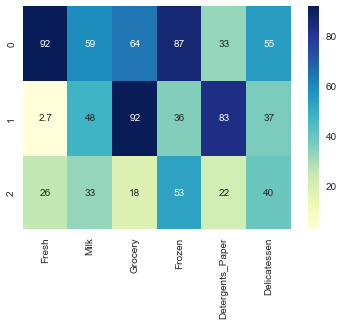

In [3]:
# Select three indices of your choice you wish to sample from the dataset
indices = [33, 193, 250]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
printmd("#### Chosen samples of wholesale customers dataset")
display(samples)

printmd("#### Percentile ranks")
# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
display(pcts)

# visualize percentiles with heatmap
_ = sns.heatmap(pcts.reset_index(drop=True), annot=True, cmap='YlGnBu')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The first example I chose purchases more from the *Fresh* and *Frozen* categories than 75% of all customers and more than 50% on all other categories except on *Detergents and Paper* so I believe it represents a Market.

The second example I chose purchases more from the *Grocery* and *Detergents and Paper* categories than 75% of all customers and has also high number of purchases for the *Milk* category but low purchases on the *Fresh*, *Frozen* and *Delicatessen* categories. This is why I consider this customer as a Retailer.

The last example I chose has a low number of purchases on all categories purchasing around the same as 25% of all customers except on the *Frozen* category in which they purchase the same amount as 50% of all customers, this is why I consider this customer is a Cafe or Restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

**R^2 Prediction Scores**

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Score,-0.625494,0.289903,0.730855,-3.642561,0.730746,0.083134


**Score of predicting *Grocery* from *Detergents_Paper*:** 0.741056186588

#### Correlations between the different features

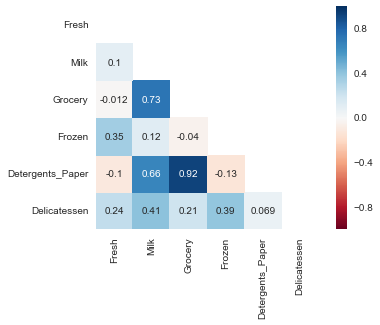

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn import tree

def regress_column(column, data):
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([column], axis = 1)
    target = data[column]

    # Split the data into training and testing sets using the given feature as the target
    train_size = 0.25
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, train_size=train_size, random_state=82)

    # Create a decision tree regressor and fit it to the training set
    regressor = tree.DecisionTreeRegressor(random_state=60)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)

    return score

printmd('**R^2 Prediction Scores**')
data_matrix = pd.DataFrame(index=['Score'])

for col in data.columns.values:
    data_matrix[col] = pd.Series([regress_column(col, data)], index = data_matrix.index)

display(data_matrix)

two_columns_data = data.drop(['Fresh', 'Milk', 'Frozen', 'Delicatessen'], axis = 1)

printmd("**Score of predicting *Grocery* from *Detergents_Paper*:** {}".format(regress_column('Grocery', two_columns_data)))

printmd("#### Correlations between the different features")

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu')

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted the prediction on all 6 features. The prediction scores are the following:

|           | Fresh     | Milk     | Grocery  | Frozen    | Detergents_Paper | Delicatessen |       
| :-------: | :-------: | :------: | | :----: | :-------: | :--------------: | :----------: |
| **Score** | -0.625494 | 0.289903 | 0.730855 | -3.642561 | 0.730746         | 0.083134     |

It is possible to observe that the *Milk*, *Grocery* and *Detergents_Paper* features have a positive R^2 score meaning that it was possible to obtain predictions for them using the remaining features. It is important to note that the R^2 for the features *Grocery* and *Detergents_Paper* is considerably high meaning that it was possible to obtain reasonable predictions for these two features. Moreover, the R^2 score of predicting the *Grocery* feature from the *Detergents_Paper* is 0.74105618658800498 which means that this two variables are correlated but they are not a linear combination of each other.

Removing one of these 2 features will reduce the information we can obtain from the model because it is not possible to predict them with a high reliability from the other features. As the number of features is really small, our model will not suffer from the *curse of dimensionality* so reducing the number of features is not necessary.

If the number of features were bigger I would consider removing one of these two features as we don't need both of them to identify customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

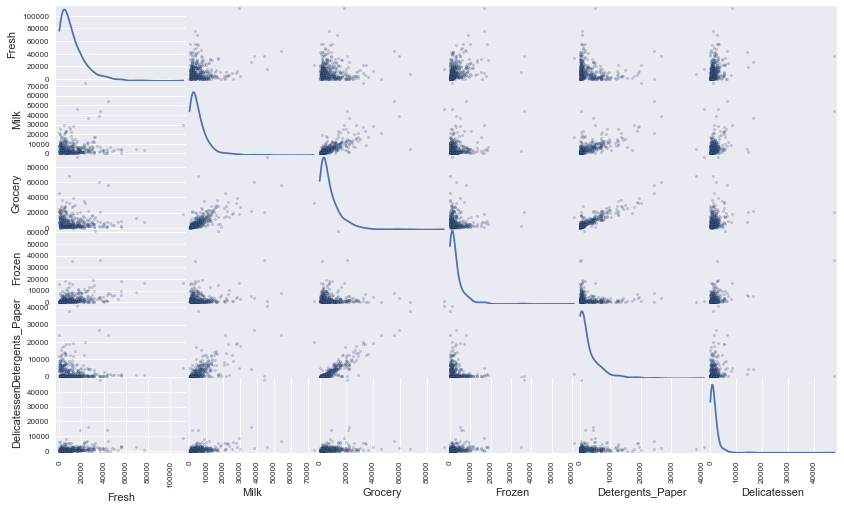

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

It is possible to see in the Scatter plots that there is a correlation between the features *Grocery* and *Detergents_Paper* as found in the previous section. It is also possible to see a slight correlation of these two features with the *Milk* feature which would explain the positive R^2 score that was obtained for this feature.

In the diagonal of the scatter plot we can visualize the plot of the distribution of each feature. None of the plots reflect what I would expect from a *normal* distribution. Instead, the plot looks more like a *lognormal* or *F* distribution with most of the data points in the range [0-20000] for the *Grocery* feature and [0-10000] for the *Detergents_Paper* feature.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

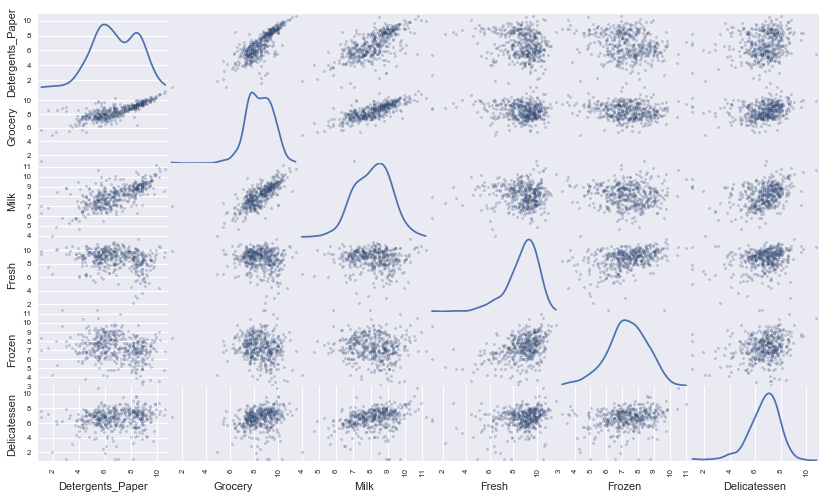

In [6]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)


# Produce a scatter matrix for each pair of newly-transformed features reordered with the most correlated features first
ix_reord = ['Detergents_Paper', 'Grocery', 'Milk', 'Fresh', 'Frozen', 'Delicatessen']
_ = pd.scatter_matrix(log_data[ix_reord], alpha = 0.3, figsize = (14,8), diagonal = 'kde')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.299878,8.473450,8.899185,8.720950,5.888878,6.987490
1,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
2,8.068090,7.597396,7.494986,7.455877,5.455321,6.565265


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh'
(Data points outside the interval [5.51455083361, 12.2705718166]):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk'
(Data points outside the interval [5.01673296722, 11.1987283614]):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery'
(Data points outside the interval [5.27575998758, 11.672709891]):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen'
(Data points outside the interval [4.26035024816, 10.5252235842]):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper'
(Data points outside the interval [1.45874266385, 12.3636993597]):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen'
(Data points outside the interval [3.76959400251, 9.74900908097]):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


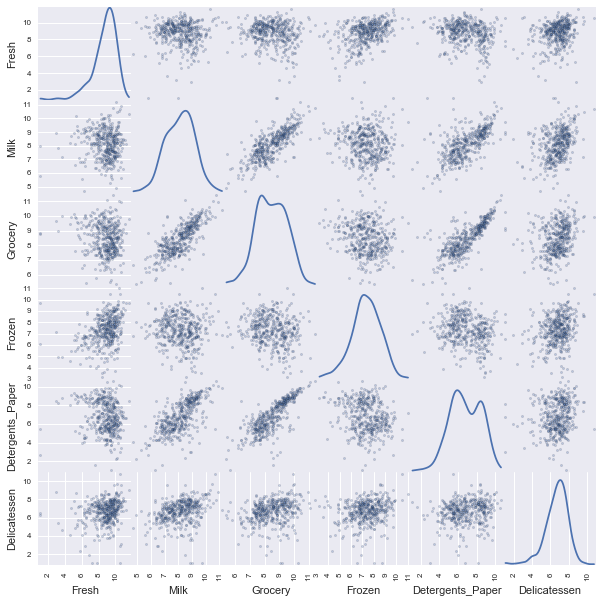

In [8]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}'".format(feature)
    print "(Data points outside the interval [{}, {}]):".format(Q1 - step, Q3 + step)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# Produce a scatter matrix for each pair of feature in the data without outliers
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

**Data Points considered outliers for more than one feature**

|           | Fresh     | Milk     | Grocery  | Frozen    | Detergents_Paper | Delicatessen |       
| :-------: | :-------: | :------: | | :----: | :-------: | :--------------: | :----------: |
| **65** | 4.442651 | 9.950323 | 10.732651 | 3.583519 | 10.095388 | 7.260523 |
| **66** | 2.197225 | 7.335634 | 8.911530 | 5.164786 | 8.151333 | 3.295837 |
| **75** | 9.923192 | 7.036148 | 1.098612 | 8.390949 | 1.098612 | 6.882437 | 
| **128** | 10.519646 | 8.875147 | 9.018332 | 8.004700 | 2.995732 | 1.098612 | 
| **154** | 6.432940 | 4.007333 | 4.919981 | 4.317488 | 1.945910 | 2.079442 | 

I decided to remove this points because, as they are detected as possible outliers for more than one feature, they have a bigger probability of really being outliers and they will affect the calcuation of the clusters and principal components.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

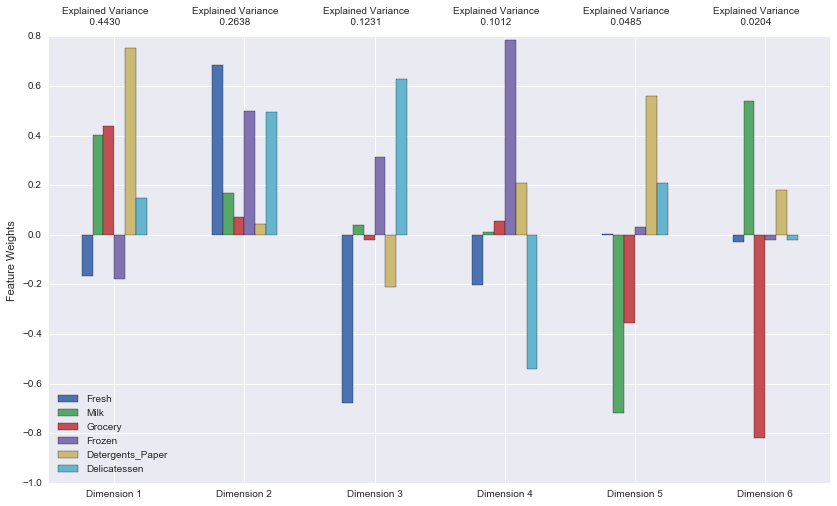

In [9]:
from sklearn.decomposition import PCA

# Apply PCA to the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

#### Cumulative explained variance

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


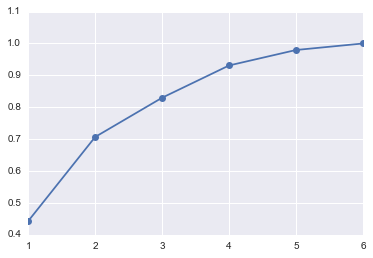

In [10]:
printmd("#### Cumulative explained variance")
print pca_results['Explained Variance'].cumsum()

# plot the variances
x = np.arange(1,7)
_ = plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

#### Total variance explained by the new dimensions

- The first and the second components explain a total of 0.7068 of the variance of the data.

- The first four components explain a total of 0.9311 of the variance of the data.

#### Representation of each dimension

- The first dimension represents a big increase on the features *Milk*, *Grocery* and *Detergents_Paper* (with an enfasis on the later), a slight increase for the feature *Delicatessen*, and a slight decrease on the features *Fresh* and *Frozen*. 

- The second dimension is almost the contrary to the first dimension with a big increase on the features *Fresh*, *Frozen* and *Delicatessen*, and a slight increase on the features *Milk*, *Grocery* and *Detergents_Paper*.

- The third dimension separates the features *Fresh* from *Delicatessen* with a big decrease for the former and a big increase for the later. Also separates the features *Frozen* and *Detergents_Paper* with an increase on the former and a decrease on the later.

- The fourth dimension separates the features *Frozen* from *Delicatessen* with a big increase for the former and a big decrease for the later. Also separates the features *Fresh* and *Detergents_Paper* with a decrease on the former and an increase on the later.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.8147,1.9456,-0.2164,0.4626,-0.8007,-0.4189
1,2.6798,-2.5907,1.7392,0.9406,0.4211,-0.7290
2,-1.5715,-0.6914,0.7154,-0.0264,-0.0495,0.2803


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

,Dimension 1,Dimension 2
0,-0.8147,1.9456
1,2.6798,-2.5907
2,-1.5715,-0.6914


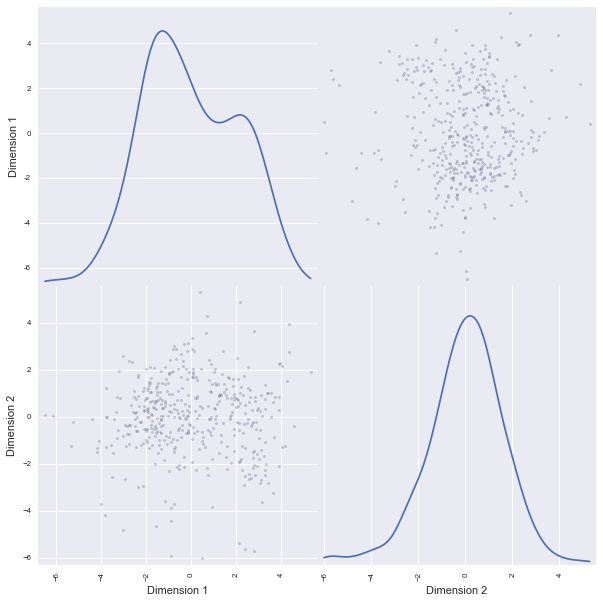

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

# Produce a scatter matrix for each pair of feature in the data without outliers
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

#### K-Means advantages

* It is the simplest clustering algorithm and it is rather easy to implement and apply even on large data sets.
* Given enough time, K-means will always converge. [[1]]
* It is well suited for finding convex clusters.

#### Gaussian Mixture Model advantages

* A "soft" classification is available allowing it to handle overlapping clusters
* There are well-studied statistical inference techniques available.
* It is the fastest algorithm for learning mixture models. [[2]]
* As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply. [[2]]

In the scatter plot of the data after the reduction of dimensionality (shown above) it is possible to see that there are two humps in the distribution of the first dimension which suggest that there are 2 clusters. On the other hand, in the plot of the first vs second dimensions it is not possible see a clear separation of the data into clusters which indicates that there is some overlapping. For this reason I will use the Gaussian Mixture Model clustering algorithm.

[1]: http://scikit-learn.org/stable/modules/clustering.html#k-means  "K-Means Clustering on Sci-kit Learn"
[2]: http://scikit-learn.org/stable/modules/mixture.html#expectation-maximization "EM Clustering on Sci-kit Learn"


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

In [14]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

def score_cluster(data, num_components):
    #  Apply the selected clustering algorithm with the numberber of components parameter 
    # to the reduced data 
    clusterer = GMM(n_components=num_components)
    clusterer.fit(data)

    # Predict the cluster for each data point
    preds = clusterer.predict(data)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(data, preds)

    return score
    
printmd('**Silhouette Score for different sizes**')
silhouette_scores_matrix = pd.DataFrame(index=['Score'])

for size in range(2,11):
    silhouette_scores_matrix[size] = pd.Series(score_cluster(reduced_data, size), index = silhouette_scores_matrix.index)
    
display(silhouette_scores_matrix)

best_n_components = 2

# Apply the selected clustering algorithm to the reduced data 
clusterer = GMM(n_components=best_n_components)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

printmd("**Best Score:** {}".format(score))

**Silhouette Score for different sizes**

,2,3,4,5,6,7,8,9,10
Score,0.411819,0.376166,0.334296,0.287123,0.270777,0.322832,0.310453,0.288829,0.315994


**Best Score:** 0.411818864386

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

**Silhouette Score for different sizes**

|   Sizes   |     2    | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| :-------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :-----: | :------: |
| **Score** | 0.411819 | 0.376166 | 0.336526 | 0.276835 | 0.285026 | 0.323986 | 0.293438 | 0.30906 | 0.314323 |

The model with 2 clusters obtains the best Silhouette score which is 0.411819.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

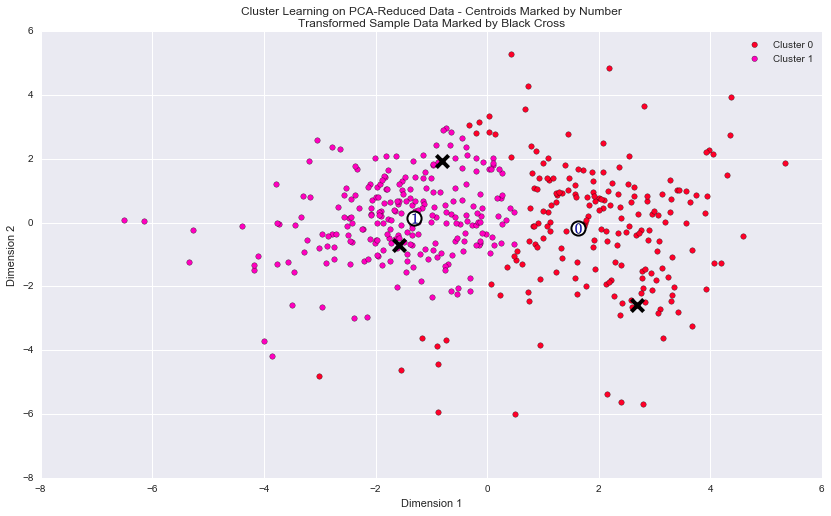

In [15]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


#### True centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4316.0,6347.0,9555.0,1036.0,3046.0,945.0
Segment 1,8812.0,2052.0,2689.0,2058.0,337.0,712.0


#### Percentiles of the centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,30.1,70.8,71.7,37.3,69.5,49.5
Segment 1,52.0,33.7,33.9,58.1,31.2,40.2


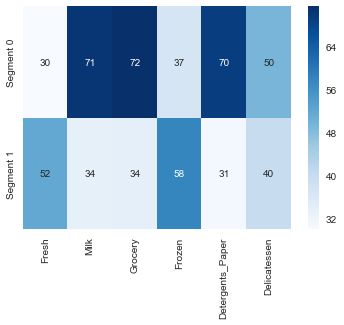

In [16]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
printmd("#### True centers")
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# add the true centers as rows to our original data
newdata = data.append(true_centers)

# show the percentiles of the centers
printmd("#### Percentiles of the centers")
ctr_pcts = 100. * newdata.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
display(ctr_pcts)

# visualize percentiles with heatmap
_ = sns.heatmap(ctr_pcts, annot=True, cmap='Blues')

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Purchases of the representative customer of the *Segment 0* in the categories *Milk*, *Grocery* and *Detergent_Paper* are near the 3th quartile which means they almost purchase on this categories more than 75% of all customers. Their purchases in the categories *Frozen* and *Delicatessen* are also considerably high and near the 2nd quartile. This is why I consider that customers in this segment are **Retail stores or Supermarkets**.

Purchases of the representative customer of the *Segment 1* in the categories *Fresh*, *Milk*, *Delicatessen* and *Frozen* are around the 2nd quartile which means they purchase on this categories more than 50% of all customers. This is why I consider that customers in this segment are **Restaurants or cafes**.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [17]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

The first sample customer purchases a lot in the *Fresh* and *Frozen* categories and these categories are ot relevant for the *Segment 0* but are for *Segment 1* so this customer is best represented by the *Segment 1* which is consistent with its prediction.

The second sample customer has high number purchases on the categories *Grocery* and *Detergents_Paper* which are the relevant for the *Segment 0* so this customer is best represented by the this segment which is consistent with its prediction.

The third sample customer does not have high number of purchases in any category, but has purchases similar to the ones in the *Segment 1* representative in the categories *Milk*, *Frozen*, *Detergents_Paper* and *Delicatessen* so this customer is best represented by this segment which is consistent with its prediction.


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

The customers in *Segment 1* purchase more products in the category *Fresh* than customers in *Segment 0*, so this customers probably would be more affected by a change in the delivery schedule as they would have to decide between purchasing more on each delivery day (and risk that the products does not remain fresh) and getting out of stock of fresh products before the next delivery.

This is why I would suggest to use the customers in *Segment 0* to test the changes to the delivery schedule.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

It could use the *customer segment* (cluster prediction) as a new feature and train a supervised learning model using this feature as target.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

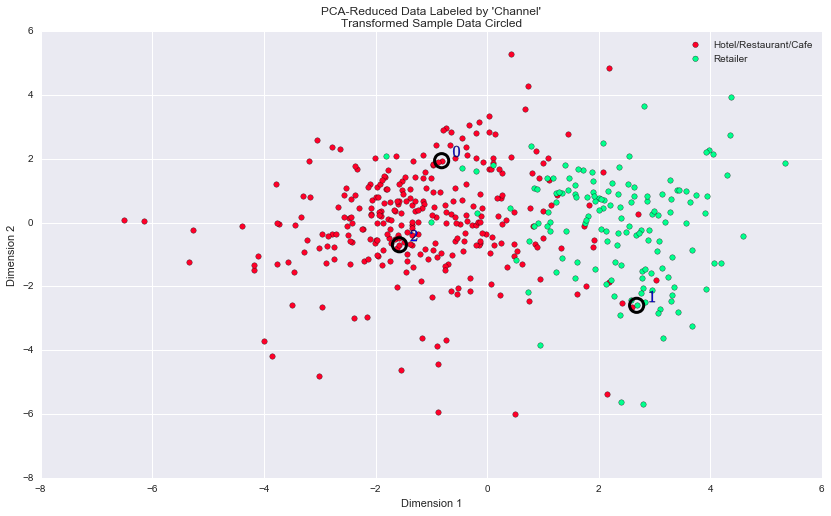

In [18]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The algorithm and the number of clusters chosen is consistent with the underlying distribution as there are two clusters (Hotel/Restaurant/Cafe customers and Retailer customers) and these clusters overlap with each other. Because of this overlap there are no customer segments that could be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' in this distribution, although most of the points that belong to each category are correctly classified in the previous results (including the sample points).

I consider that the previous definition of customer segments is consistent with the classification using the *Channel* feature.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.